In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('stock_exchange_data/indexProcessed.csv')

Key:
NYA (USD) = New York Stock Exchange
IXIC (USD) = NASDAQ, US
HSI (HKD) = Hong Kong Stock Exchange
000001.SS (CNY) = Shanghai SE, China
N225 (JPY) = Tokyo SE
N100 (EUR) = Euronext, europe
399001.SZ (CNY) = Shenzhen SE, China
GSPTSE (CAD) = Toronto SE
NSEI (INR) = National SE of India
GDAXI (EUR) = Frankfurt SE
KS11 (KRW) = Korea Exchange
SSMI (CHF) = SIX Swiss Exchange
TWII (TWD) = Taiwan SE
J203.JO (ZAR) = Johannesburg SE

Can do either NYSE and NASDAQ and potentiallly Canada
or Shenzen and Shanghai/Hong Kong and Taiwan

In [3]:
#df1 = df[df['Position'].str.contains("HSI")]
nyse = df[df['Index'].str.contains("NYA")]
nasdaq = df[df['Index'].str.contains("IXIC")]
toronto = df[df['Index'].str.contains("GSPTSE")]

shenzhen = df[df['Index'].str.contains("399001.SZ")]
shanghai = df[df['Index'].str.contains("000001.SS")]
hongkong = df[df['Index'].str.contains("HSI")]
taiwan = df[df['Index'].str.contains("TWII")]

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
modifiedshanghai = pd.read_csv('stock_exchange_data/shanghai.csv')
modifiedshenzhen = pd.read_csv('stock_exchange_data/shenzhen.csv')

changeshang = []
changeshen = []
minmaxshang = []
minmaxshen = []
for index in modifiedshanghai.index:
    changeshang.append(abs(modifiedshanghai['Open'][index] - modifiedshanghai['Close'][index]))
    minmaxshang.append(modifiedshanghai['High'][index] - modifiedshanghai['Low'][index])
for index in modifiedshenzhen.index:
    changeshen.append(abs(modifiedshenzhen['Open'][index] - modifiedshenzhen['Close'][index]))
    minmaxshen.append(modifiedshenzhen['High'][index] - modifiedshenzhen['Low'][index])
modifiedshanghai['Daily Change'] = changeshang
modifiedshenzhen['Daily Change'] = changeshen
modifiedshanghai['High Low Difference'] = minmaxshang
modifiedshenzhen['High Low Difference'] = minmaxshen
print(modifiedshanghai)

          Index        Date         Open         High          Low  \
0     000001.SS  1997-08-15  1174.182983  1174.881958  1133.890015   
1     000001.SS  1997-08-18  1139.605957  1139.605957  1116.147949   
2     000001.SS  1997-08-19  1134.616943  1143.201050  1128.109009   
3     000001.SS  1997-08-20  1135.050049  1144.645996  1133.741943   
4     000001.SS  1997-08-21  1148.386963  1165.218018  1147.816040   
...         ...         ...          ...          ...          ...   
5755  000001.SS  2021-05-25  3502.540039  3584.580078  3502.439941   
5756  000001.SS  2021-05-26  3586.840088  3603.489990  3585.370117   
5757  000001.SS  2021-05-27  3585.729980  3626.360107  3579.260010   
5758  000001.SS  2021-05-28  3610.770020  3622.179932  3582.360107   
5759  000001.SS  2021-05-31  3600.070068  3615.659912  3580.649902   

            Close    Adj Close    Volume    CloseUSD  Daily Change  \
0     1143.063965  1143.063965       0.0  182.890234     31.119018   
1     1134.634033  

In [6]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [7]:
from sklearn.model_selection import train_test_split

x = modifiedshanghai[['Adj Close','Open','Daily Change', 'High Low Difference']]
y = modifiedshenzhen['Adj Close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
LinReg.fit(x_train, y_train)
predictions = LinReg.predict(x_test)
pd.DataFrame(LinReg.coef_, x.columns, columns = ['Coeff'])

,Coeff
Adj Close,3.436999
Open,0.750126
Daily Change,3.898059
High Low Difference,-6.792791


In [8]:
LinReg.coef_

array([ 3.43699924,  0.75012598,  3.89805899, -6.79279059])

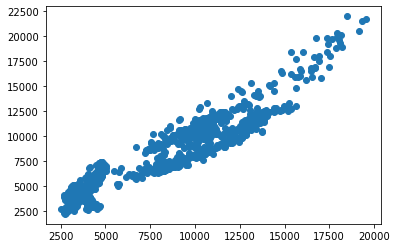

In [19]:
plt.scatter(y_test, predictions)

In [10]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
pred_train = LinReg.score(x_train,y_train)
pred_test = LinReg.score(x_test,y_test)
print(pred_train)
print(pred_test)

1118.5277061913698
1774779.0468855007
0.8846699622473828
0.8897570860462161


In [21]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(x_train, y_train)
print(lasso_reg.score(x_test, y_test))
print(lasso_reg.score(x_train, y_train))

0.8896734627437464
0.8845800021943857


In [12]:
lasso_reg.coef_

array([ 4.1668356 ,  0.00829001,  2.40062125, -5.64816092])

In [13]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(x_train, y_train)
print(ridge_reg.score(x_test, y_test))
print(ridge_reg.score(x_train, y_train))

0.8897570924867437
0.8846699622449884


In [14]:
ridge_reg.coef_

array([ 3.43698273,  0.75013946,  3.89770955, -6.79249143])

In [15]:
x_switch = modifiedshenzhen[['Adj Close','Open','Daily Change', 'High Low Difference']]
y_switch = modifiedshanghai['Adj Close']
print(lasso_reg.score(x_switch, y_switch))

print(ridge_reg.score(x_switch, y_switch))

print(LinReg.score(x_switch,y_switch))


-1242.4187276156995
-1244.6412959905063
-1244.6416315863307


In [16]:
# to test how the model works when trained on old data
oldshanghai = modifiedshanghai.iloc[:-2880]
oldshenzhen = modifiedshenzhen.iloc[:-2880]
modernshenzhen = modifiedshenzhen.iloc[2880:]

x_old = oldshenzhen[['Adj Close','Open','Daily Change', 'High Low Difference']]
y_old = oldshanghai['Adj Close']
y_modern = modernshenzhen['Adj Close']

x_old_train, x_old_test, y_old_train, y_old_test = train_test_split(x_old, y_old, test_size = 0.2)

In [17]:
lasso_reg_old = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg_old.fit(x_old_train, y_old_train)
# see how the regression works as intended
print(lasso_reg_old.score(x_old_test, y_old_test))
print(lasso_reg_old.score(x_old_train, y_old_train))

# see how the regression trained on old data works on modern data
print(lasso_reg_old.score(x_old, y_modern))

0.9428520107444144
0.9318797328481931
-19.19652604614309


In [18]:
# same as above but a ridge regression
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(x_old_train, y_old_train)
print(ridge_reg.score(x_old_test, y_old_test))
print(ridge_reg.score(x_old_train, y_old_train))

print(ridge_reg.score(x_old, y_modern))


0.9440040754567133
0.9331132123347091
-19.200766799007287
